In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd  # Import the pandas library

df = pd.read_csv("train.csv")  # Use pd.read_csv to read the CSV file

In [ ]:
df.shape

(891, 12)

**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


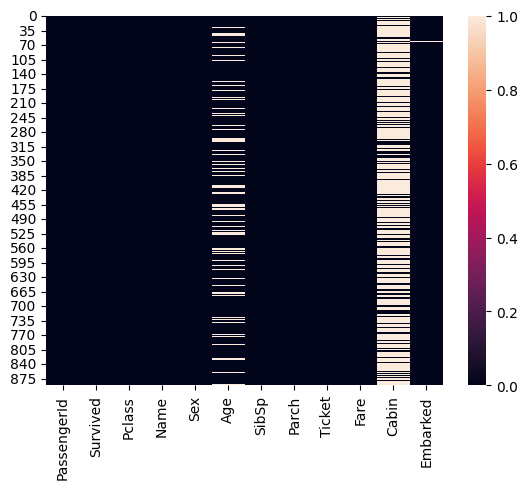

In [ ]:
sns.heatmap(df.isnull());

In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [ ]:
# Filling null Value with mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

<Axes: >

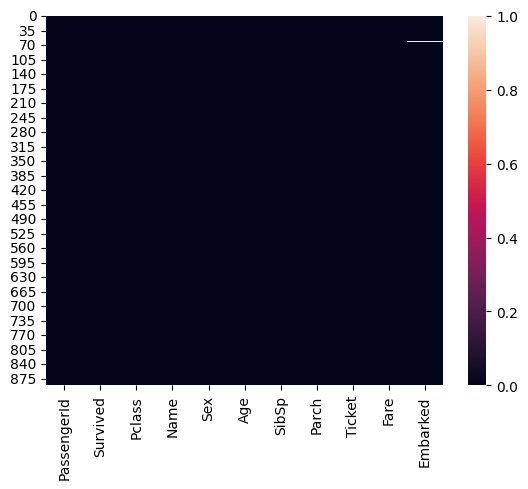

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Identifying duplicate values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder= LabelEncoder()
df["Name"]=encoder.fit_transform(df["Name"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Ticket"]=encoder.fit_transform(df["Ticket"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,522,7.2500,2
1,2,1,1,190,0,38.0,1,0,595,71.2833,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2
3,4,1,1,272,0,35.0,1,0,48,53.1000,2
4,5,0,3,15,1,35.0,0,0,471,8.0500,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    int64  
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    int64  
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 83.3 KB


## Check for outliers

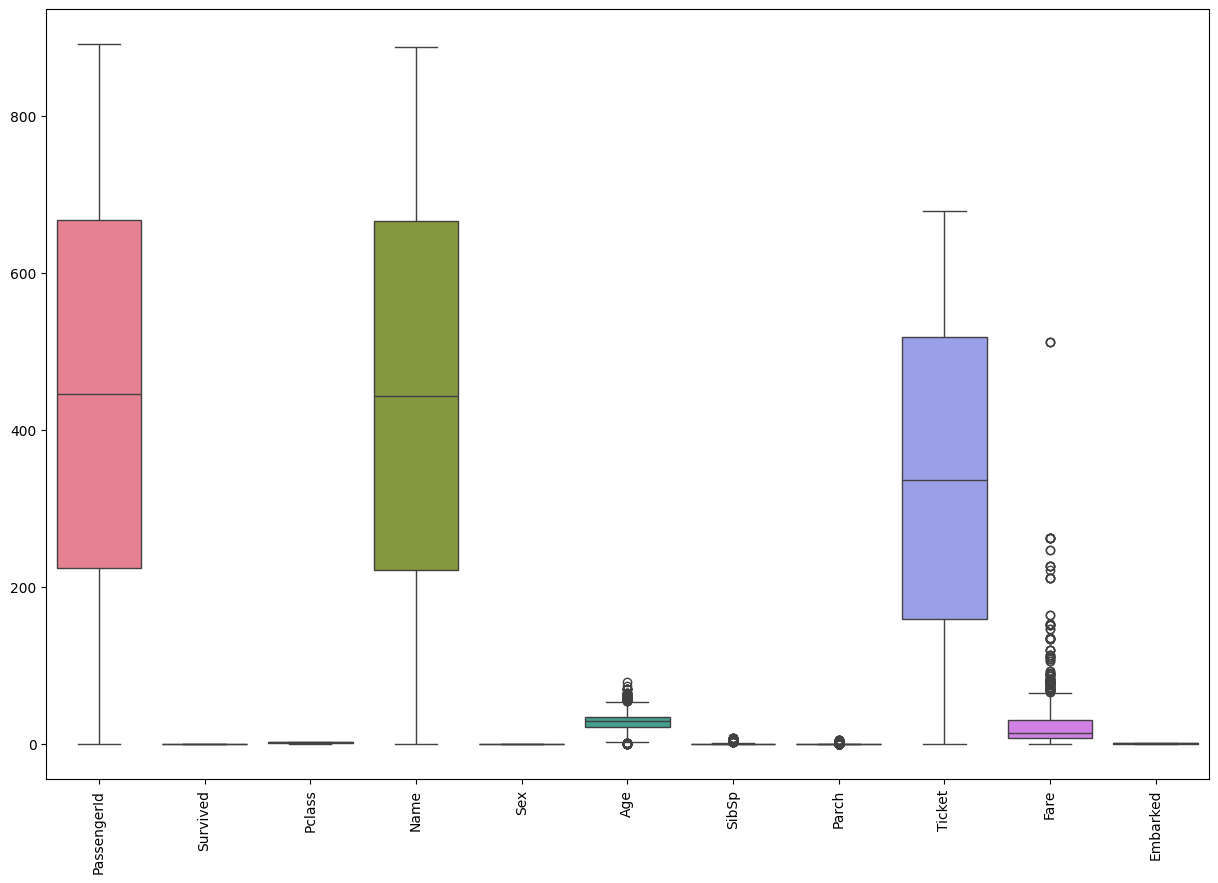

In [ ]:
# Create box plots for all columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

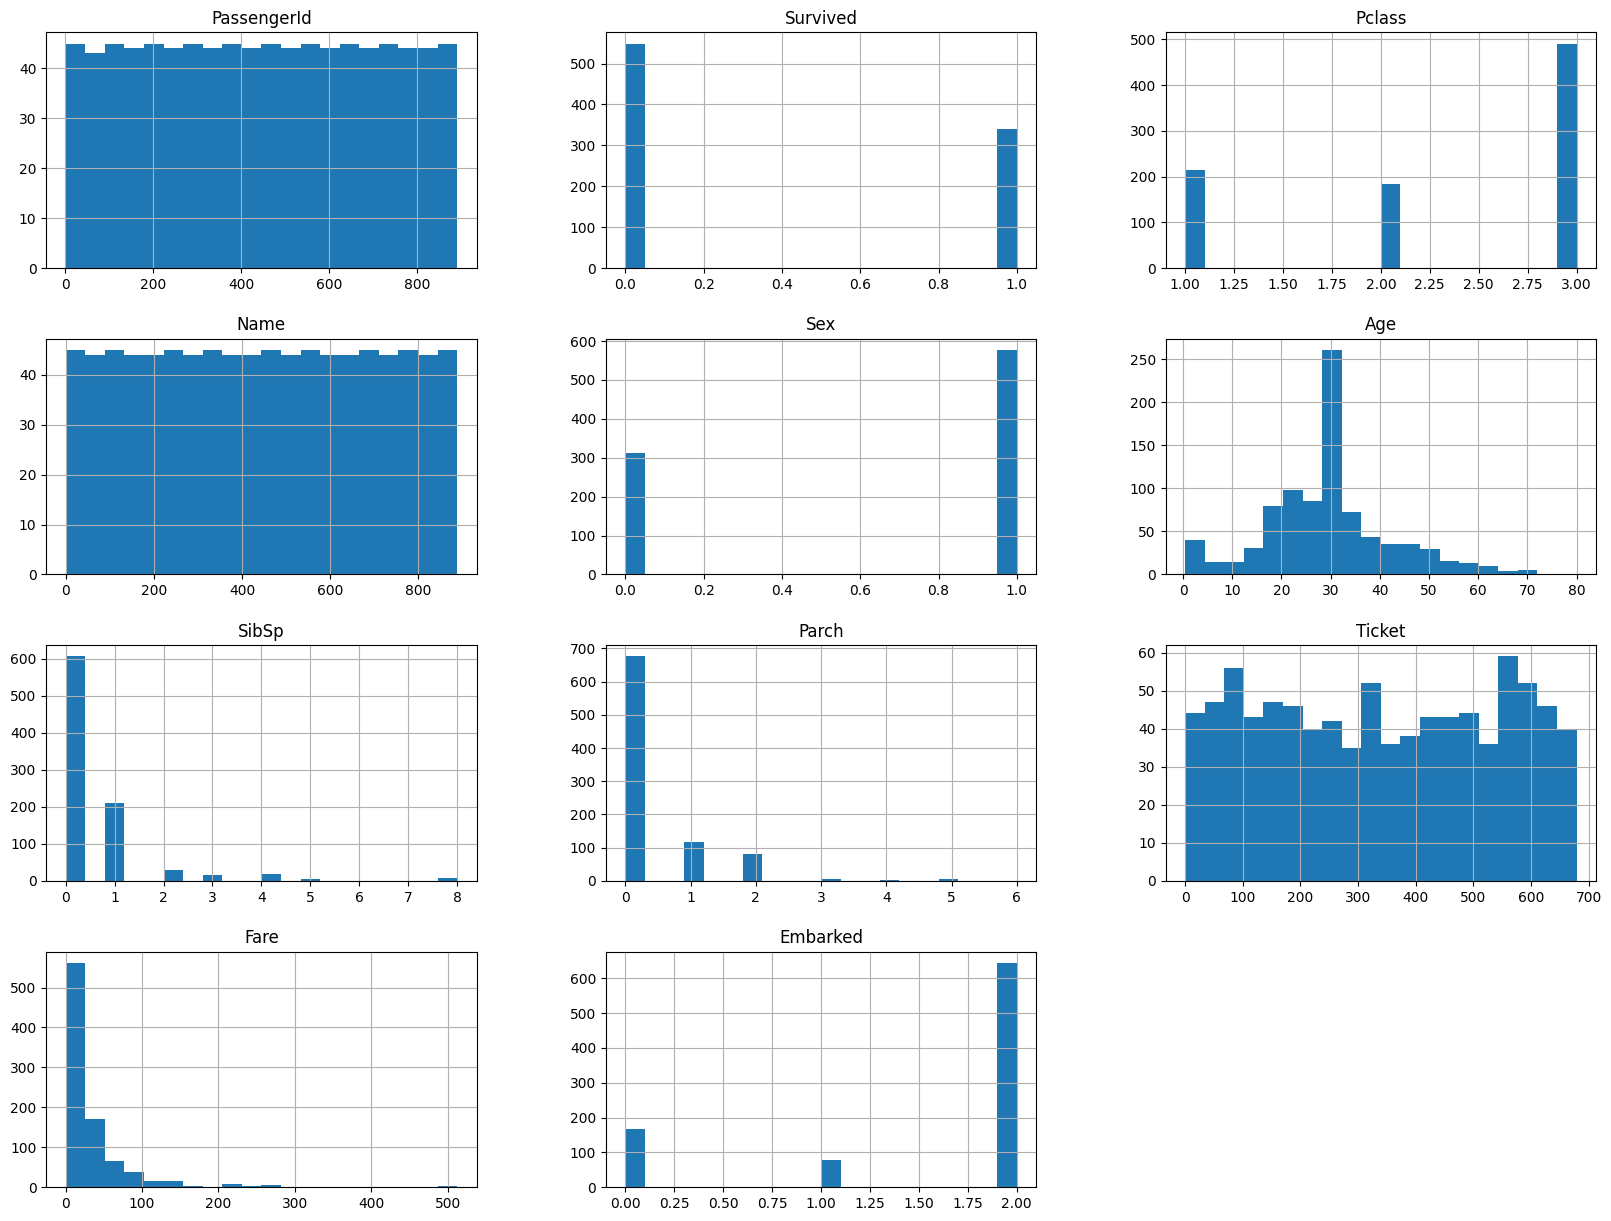

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=20 , figsize = (20 , 15))
plt.show()

In [ ]:
df['Age'].value_counts()

,count
Age,
29.699118,177
24.000000,30
22.000000,27
18.000000,26
28.000000,25
...,...
36.500000,1
55.500000,1
0.920000,1


In [ ]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,340


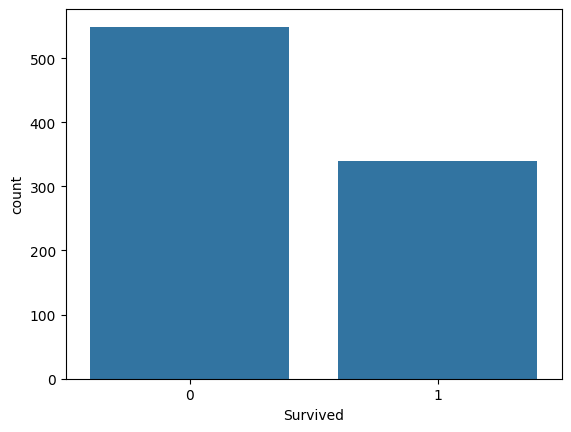

In [ ]:
sns.countplot(x='Survived',data=df);


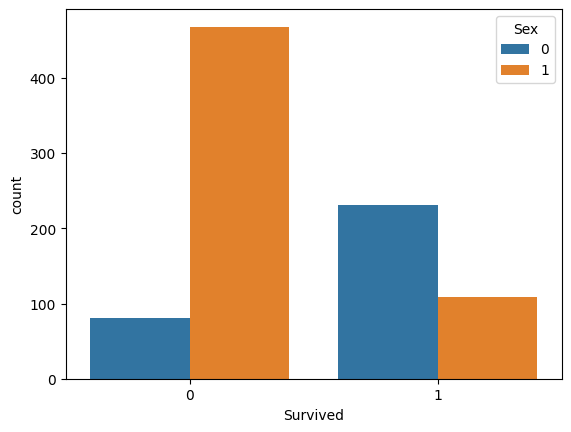

In [ ]:
sns.countplot(x ='Survived' , hue = 'Sex' , data = df)
plt.show()

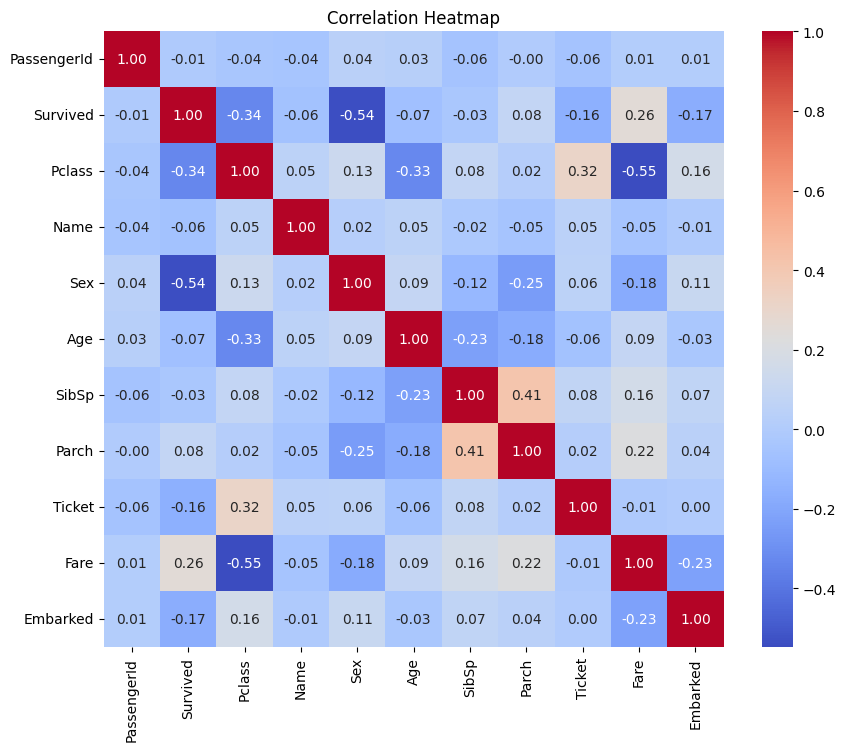

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

### Changing column order

In [ ]:
# Reorder columns, moving 'Survived' to the front
new_order = ['Survived'] + [col for col in df.columns if col != 'Survived']
df = df[new_order]


##Dropping unnecessary columns

### columns like 'Name' and 'Ticket' might not be useful for predicting survival and could potentially be dropped.

In [ ]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [ ]:
df

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.000000,1,0,7.2500,2
1,1,2,1,0,38.000000,1,0,71.2833,0
2,1,3,3,0,26.000000,0,0,7.9250,2
3,1,4,1,0,35.000000,1,0,53.1000,2
4,0,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,887,2,1,27.000000,0,0,13.0000,2
887,1,888,1,0,19.000000,0,0,30.0000,2
888,0,889,3,0,29.699118,1,2,23.4500,2
889,1,890,1,1,26.000000,0,0,30.0000,0


### imbalance

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,340


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Initialize SMOTE
smote = SMOTE()


X_resampled, y_resampled = smote.fit_resample(X, y)


df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Survived'] = y_resampled

In [ ]:
df_balanced

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.000000,1,0,7.250000,2,0
1,2,1,0,38.000000,1,0,71.283300,0,1
2,3,3,0,26.000000,0,0,7.925000,2,1
3,4,1,0,35.000000,1,0,53.100000,2,1
4,5,3,1,35.000000,0,0,8.050000,2,0
...,...,...,...,...,...,...,...,...,...
1093,829,2,1,29.699118,0,0,8.378821,0,1
1094,221,2,1,20.948096,0,0,12.806407,1,1
1095,70,3,0,29.787372,0,0,14.433073,0,1
1096,304,1,0,44.193220,0,0,142.273234,0,1


### normalization

### This will standardize the 'Age' and 'Fare' columns to have a mean of 0 and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
numerical_cols = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Calculate mean and standard deviation of normalized columns
print(df[numerical_cols].mean())
print(df[numerical_cols].std())

Age     3.316932e-16
Fare    1.398706e-16
dtype: float64
Age     1.000563
Fare    1.000563
dtype: float64


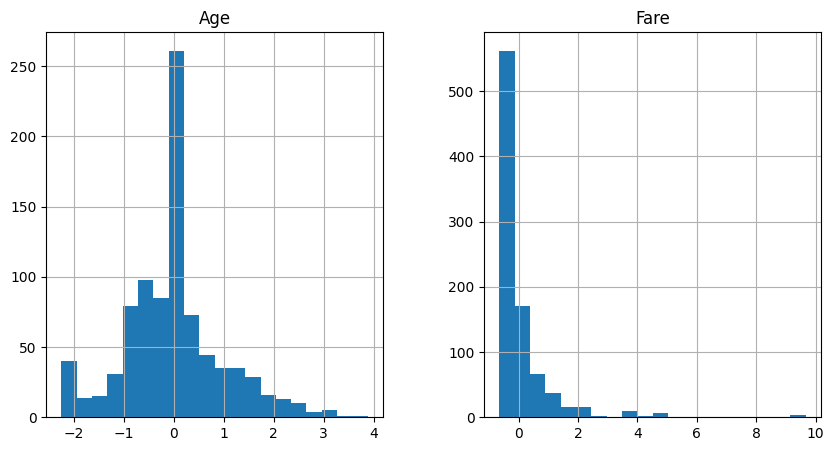

In [ ]:

# Plot histograms for normalized features
df[numerical_cols].hist(bins=20, figsize=(10, 5))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

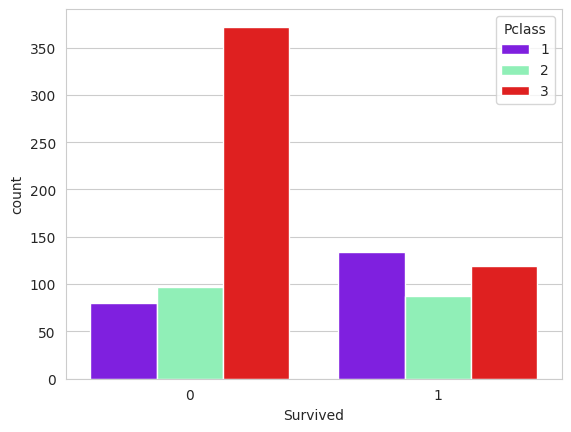

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: >

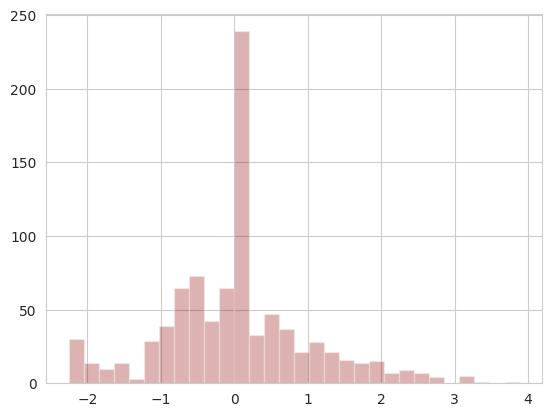

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

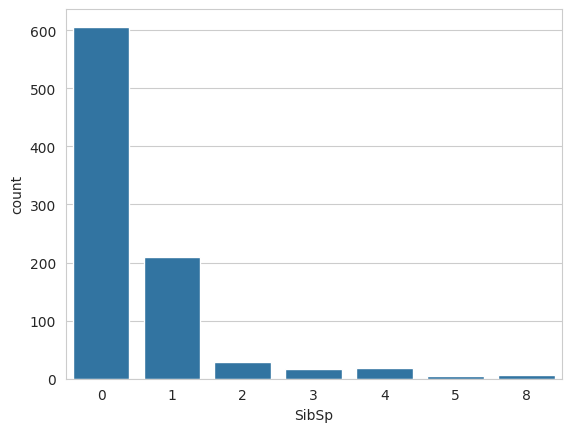

In [ ]:
sns.countplot(x='SibSp',data=df)

<Axes: >

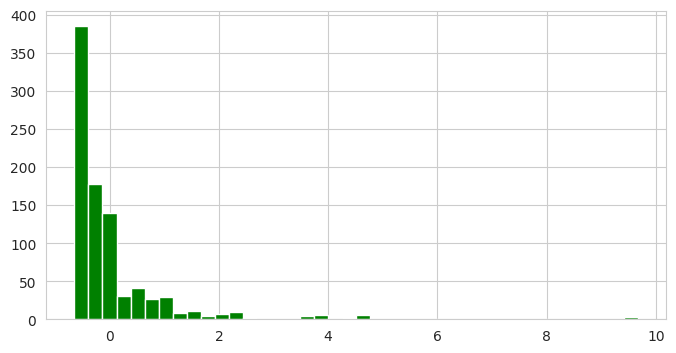

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<ipython-input-43-83094e579066>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

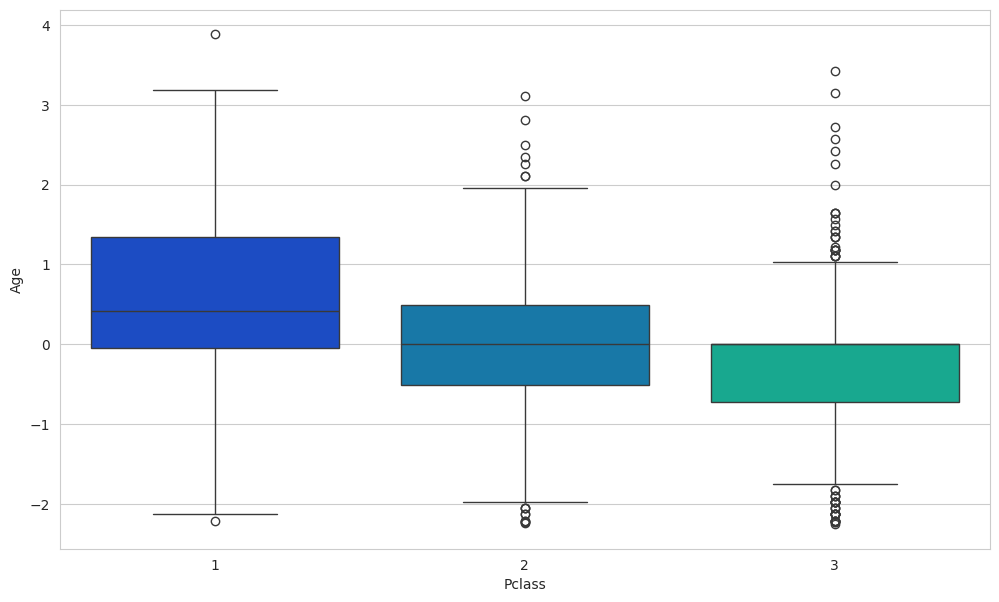

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

## Building a Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop("Survived", axis=1).values
Y = df["Survived"].values

In [ ]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=3000)

In [ ]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=3000)

In [ ]:
y_pred = logisticregression.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [ ]:
print("Classification report :", classification_report(Y_test,y_pred))

Classification report :               precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



In [ ]:
print("Confusion Metrix:")
print(confusion_matrix(Y_test,y_pred))

Confusion Metrix:
[[144  22]
 [ 22  79]]


In [ ]:
print("Accuracy score :", accuracy_score(Y_test,y_pred))

Accuracy score : 0.8352059925093633


In [ ]:
print("Training data accuracy:", logisticregression.score(X_train,Y_train))
print("Test data accuracy:", logisticregression.score(X_test,Y_test))

Training data accuracy: 0.7861736334405145
Test data accuracy: 0.8352059925093633
